### Analysis of mobility data 

Here we analyze **global** mobility patterns. For this we first plot some general features on a map.
We analyze global mobility data (air planes) Open mobility data (accessed June 2019) https://bluehub.jrc.ec.europa.eu/migration/app/index.html?state=5cc845a97758cd17cdecd1fb

Some other interesting data sources are 
https://github.com/nateraluis/bicycle-network-growth/blob/master/02_BicycleAlgorithms.ipynb 

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict
#import networkx as nx
#import cartopy.crs as ccrs

import geopandas as gpd
#from descartes import PolygonPatch

print('reading data from xlsx files global mobility')
data_gl = pd.read_excel('Global_Transnational_Mobility_dataset_v1_0.xlsx')
print('accessing the data')

data_gl.target_name.iloc[1]
print('analyzing the data from Global mobility')
print('plotting number of incoming flights per country as function of time (year)')
ind_data_in =data_gl.loc[data_gl['target_name'] == 'India']
type(ind_data_in)

ind_data_in.source_name.iloc[12]
print('calculating properties of new dataframe')

len(ind_data_in.shape)

reading data from xlsx files global mobility
accessing the data
analyzing the data from Global mobility
plotting number of incoming flights per country as function of time (year)
calculating properties of new dataframe


2

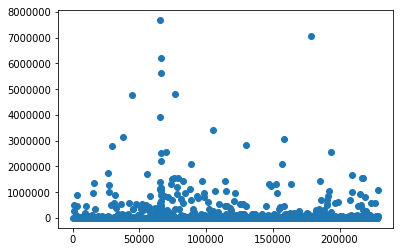

In [23]:
plt.plot(ind_data_in.estimated_trips, 'o')

In [25]:
ind_data_in.estimated_trips

539           229.0
822        256595.0
1101       482618.0
2359         3728.0
2797        98604.0
2837          439.0
2911            7.0
3295          988.0
3413         1326.0
3546          219.0
3573       482228.0
3610         8424.0
3636       890920.0
3637         7466.0
3814          232.0
3817        21027.0
3942         8173.0
4121         1151.0
4674        20446.0
5790         2987.0
5851        21600.0
5911        15873.0
6007          762.0
6191           62.0
6636         1495.0
6770         1210.0
7149         7121.0
7387        12112.0
7488         3467.0
7737           74.0
            ...    
221853      15694.0
222094        654.0
222104       5246.0
222282       5046.0
222528      16431.0
222850      96055.0
222868      30962.0
223207      12010.0
223270     565516.0
223622       1207.0
223897      45407.0
224065       8757.0
224538       1029.0
224676       3615.0
225216       3282.0
226147       4858.0
226258       1001.0
226507       1359.0
226872     569065.0


In [ ]:

ind_data_sort = ind_data_in.sort_values('year')



In [ ]:
plt.plot(ind_data_sort.estimated_trips.values, 'o')

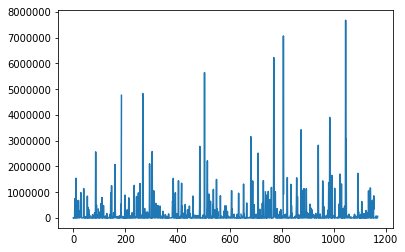

In [33]:
plt.plot(ind_data_sort.estimated_trips.values)

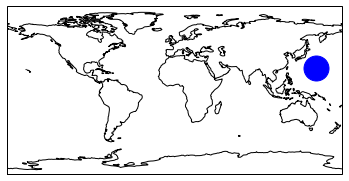

In [7]:
'''
Let us plot the color of each country according to total number of flights in year 2013

For this we first plot basemap
'''
import geopandas as gpd
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from collections import OrderedDict
import networkx as nx
from descartes import PolygonPatch

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ll_to_pixel = ccrs.Geodetic()._as_mpl_transform(ax)

# We need to call draw to ensure that the axes location has been defined
# fully. 
plt.draw()


# Now lets figure out the pixel coordinate of the city.
x1_pix, y1_pix = ll_to_pixel.transform_point([151.2111, -33.8600])
x2_pix, y2_pix = ll_to_pixel.transform_point([101.2111, -33.8600])

# We can even plot these pixel coordinates directly with matplotlib.
plt.plot(x1_pix, y1_pix, 'ob', markersize=25, transform=None)
plt.plot(x2_pix, y2_pix, 'ob', markersize=25, transform=None)

#plt.savefig('figure_1.png', dpi=plt.gcf().get_dpi())
plt.show()

We plot some usual properties using world geopandas module.

To read more about this amazing cartopy feature go to 
https://geopandas.readthedocs.io/en/latest/mapping.html


In [ ]:


fig, ax = plt.subplots(1, 1)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print('printing properties with world geopandas ')
#plot those GeoDataFrames
print(world.head())


print('ploting cities ')
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world.head() 
#plot world map 
world.plot()

'''
# Plot population estimates with an accurate legend
'''

#fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est', ax=ax, legend=True)

country_names = world[['name', 'iso_a3']]
#we use underlying base map 
base = world.plot(color='white', edgecolor='black')

#we plot all cities on a basemap
cities.plot(ax=base, marker='o', color='red', markersize=5);
plt.show()


printing properties with world geopandas 
     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1  POLYGON ((33.90371119710453 -0.950000000000000...  
2  POLYGON ((-8.665589565454809 27.65642588959236...  
3  (POLYGON ((-122.84 49.00000000000011, -122.974...  
4  (POLYGON ((-122.84 49.00000000000011, -120 49....  
ploting cities 


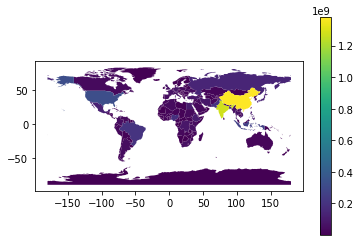

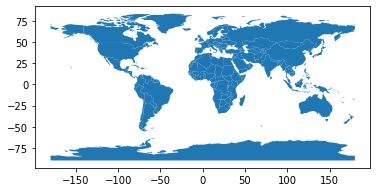

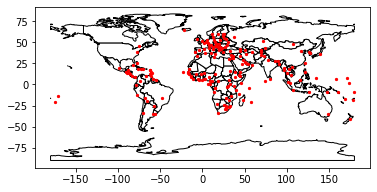

reading data from xlsx files global mobility
accessing the data
   source_name               target_name source_iso3 target_iso3  year  \
0  Afghanistan                    Rwanda         AFG         RWA  2014   
1        Benin                    Angola         BEN         AGO  2014   
2      Ireland  Turks and Caicos Islands         IRL         TCA  2011   
3      Georgia                     Tonga         GEO         TON  2013   
4        Ghana       Trinidad and Tobago         GHA         TTO  2016   

   estimated_trips       dist source_region target_region    source_subregion  \
0             29.0   5755.222          Asia        Africa       Southern Asia   
1            589.0   2071.837        Africa        Africa  Sub-Saharan Africa   
2            163.0   6459.006        Europe      Americas     Northern Europe   
3              0.0  15651.360          Asia       Oceania        Western Asia   
4            275.0   6765.163        Africa      Americas  Sub-Saharan Africa   

    

ValueError: Empty data passed with indices specified.

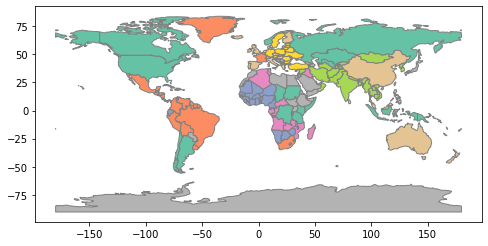

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
#loading GeoDataFrames 


def plot_country_color( axes, country_name, fcolor ):
    '''
    plot each country in specific color with provided axes
    '''
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

    
'''
Access 'flights' data
'''
print('reading data from xlsx files global mobility')
data_gl = pd.read_excel('Global_Transnational_Mobility_dataset_v1_0.xlsx')

print('accessing the data')
print(data_gl.head())

print('make column with flights per each country "source_iso3" in 2014')
#create dataframe from data_gl for data_gl_2014


is_2014 = data_gl['year']==2014
data_2014 = data_gl[is_2014]

#data_gl_2014 = data_gl.iloc[data_gl['year'] == '2014']
print('new dataframe for 2014 is created')
#loop through all elements in iso_a3 

#for index, row in data_2014.iterrows(): 
#    print (row["source_iso3"], row["estimated_trips"])


#Now we plot number of flights on the map using plotCountryPatch function
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    
    
'''
Now we plot the whole world
'''
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
#ax2 = world[world.continent == 'Europe'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')

'''
Now we color the world with colors per country as number of trips
Warning: some errors due to missing values
'''
# then plot some countries on with color encoded in estimated_trips
for index, row in data_2014.iterrows(): 
    print (row["source_iso3"], row["estimated_trips"])
    plot_country_color(ax2, row["source_iso3"], row["estimated_trips"])

#plotCountryPatch(ax2, 'Germany', 'red')
#plotCountryPatch(ax2, 'Poland', 'green')

    
'''
Another option is:
Insert additional column 'flights' to the gpd.world dataframe with the number of flights
'''
#idx = 7
#new_col = [7, 8, 9] #number of flights from this country from another dataframe
#world.insert(loc=idx, column='flights', value=new_col)

In [1]:
'''
Now using example file from plotly 
https://plot.ly/python/lines-on-maps/ 
we plot the flights on a map
'''

import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    ))]

flight_paths = []
for i in range(len(df_flight_paths)):
    flight_paths.append(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i]],
            lat = [df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
        )
    )

layout = go.Layout(
    title = go.layout.Title(
        text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)'
    ),
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'north america',
        projection = go.layout.geo.Projection(type = 'azimuthal equal area'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig = go.Figure(data = flight_paths + airports, layout = layout)
py.iplot(fig, filename = 'd3-flight-paths')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

### Airport travel network visualisation

We use openflights open data https://openflights.org/data.html#airline, we are also using the information and ideas from https://www.dataquest.io/blog/python-data-visualization-libraries/ 
<img src="openflights-routedb.png" alt="Drawing" style="width: 200px;"/>


In [8]:
# Analysis of global mobility patterns

# Import the pandas library.
import pandas
import csv
import numpy as np
import pandas



# convert dat file to csv 
# read flash.dat to a list of lists
print('reading airports')
#data_airports = np.fromfile( 'C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airports.dat')#, dtype=dt)# np.loadtxt )
#type(data_airports)

#data_airlines = np.fromfile( 'C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airlines.dat')#, dtype=dt)# np.loadtxt )
#type(data_airlines)

# Read in the airports data.
airports = pandas.read_csv("C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airports.dat", header=None, dtype=str)
airlines = pandas.read_csv("C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airlines.dat", header=None, dtype=str)
routes = pandas.read_csv("C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/routes.dat", header=None, dtype=str)


airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "offset", "dst", "timezone", "type", "nametype"]
# Read in the airlines data.airlines = pandas.read_csv("airlines.csv", header=None, dtype=str)
print('reading airlines')
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

# Read in the routes data.routes = pandas.read_csv("routes.csv", header=None, dtype=str)
print('reading routes')
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]
print(type(airports))

airports.head()

print("data loading finished")


reading airports
reading airlines
reading routes
<class 'pandas.core.frame.DataFrame'>
data loading finished


In [9]:
# routes will be our links in the travel network

routes.head()


,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [10]:
#to ensure numerical data for routes
routes = routes[routes["airline_id"] != "\\N"]


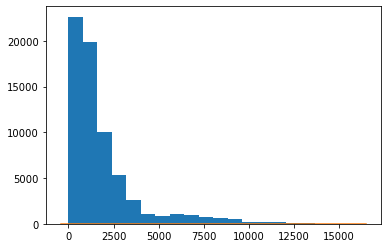

In [15]:
# Now we count the length of routes. 
# This can tell us if airlines fly more shorter routes, or more longer ones. 

import math
import matplotlib.pyplot as plt

import seaborn

def haversine(lon1, lat1, lon2, lat2):
    # Convert coordinates to floats.
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    # Convert to radians from degrees.
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Compute distance.
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    km = 6367 * c
    return km

# function copied from https://www.dataquest.io/blog/python-data-visualization-libraries/

def calc_dist(row):
    dist = 0
    try:
        # Match source and destination to get coordinates.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Use coordinates to compute distance.
        dist = haversine(dest["longitude"], dest["latitude"], source["longitude"], source["latitude"])
    except (ValueError, IndexError):
        pass
    return dist


# now we apply this function to routes dataframe
route_lengths = routes.apply(calc_dist, axis=1)



# now we are plotting the histogram 
plt.hist(route_lengths, bins=20)
plt.show()

seaborn.distplot(route_lengths, bins=20)
plt.show()

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


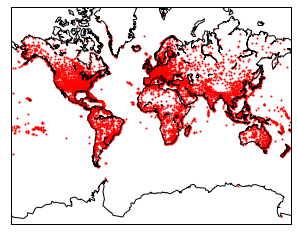

In [21]:
# Now let us plot data on a maps
# First we define x as ids of airports
#name_lengths = airlines["name"].apply(lambda x: len(str(x)))
#plt.scatter(airlines["id"].astype(int), name_lengths)

#data = pandas.DataFrame({"lengths": name_lengths, "ids": airlines["id"].astype(int)})
#seaborn.jointplot(x="ids", y="lengths", data=data)



# using latitude and longitude pairs for airports. The first map we can make is one that shows all the airports all over the world. We can do this with the basemap extension to matplotlib. This enables drawing world maps and adding points, and is very customizable.

# Import the basemap package
from mpl_toolkits.basemap import Basemap

# Create a map on which to draw. 
# Use mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.


m.drawcoastlines()
m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()


C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


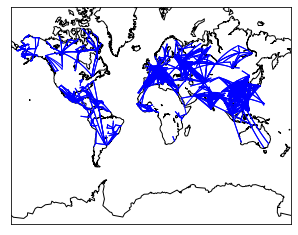

In [30]:
# Make a base map with a mercator projection.
# Draw the coastlines.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
# Iterate through the first 3000 rows.
for name, row in routes[:3000].iterrows():
    try:
        # Get the source and dest airports.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Don't draw overly long routes.
        if abs(float(source["longitude"]) - float(dest["longitude"])) < 90:
            # Draw a great circle between source and dest airports.
            m.drawgreatcircle(float(source["longitude"]), float(source["latitude"]), float(dest["longitude"]), float(dest["latitude"]),linewidth=1,color='b')
    except (ValueError, IndexError):
        pass
    # Show the map.
plt.show()

We can also plot map using folium map as we did here 
https://github.com/Liyubov/mobility_analysis/blob/master/Analysis%20of%20human%20mobility%20trajectories%20%23%20open%20humans%20data.ipynb


In [24]:
import folium

airports_map = folium.Map(location=[30, 0], zoom_start=2)
# Draw markers on the map.


We can also do the map visualisaton with another library, altair from Python :)

In [32]:
import altair as alt
from vega_datasets import data

# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

alt.Chart(source).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='leading digit:N',
    tooltip='zip_code:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


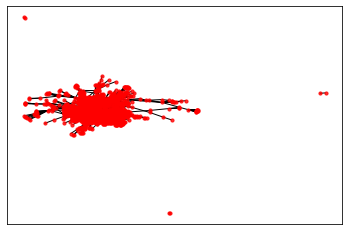

In [41]:
# Import networkx and initialize the graph.
import networkx as nx


# Initialize the weights dictionary.
weights = {}
# Keep track of keys that have been added once -- we only want edges with a weight of more than 1 to keep our network size manageable.
added_keys = []
# Iterate through each route.
for name, row in routes.iterrows():
    # Extract the source and dest airport ids.
    source = row["source_id"]
    dest = row["dest_id"]
        # Create a key for the weights dictionary.
    # This corresponds to one edge, and has the start and end of the route.
    key = "{0}_{1}".format(source, dest)
    # If the key is already in weights, increment the weight.
    if key in weights:
        weights[key] += 1
    # If the key is in added keys, initialize the key in the weights dictionary, with a weight of 2.
    elif key in added_keys:
        weights[key] = 2
    # If the key isn't in added_keys yet, append it.
    # This ensures that we aren't adding edges with a weight of 1.
    else:
        added_keys.append(key)

graph = nx.Graph()
# Keep track of added nodes in this set so we don't add twice.
nodes = set()
# Iterate through each edge.
for k, weight in weights.items():
    try:
        # Split the source and dest ids and convert to integers.
        source, dest = k.split("_")
        source, dest = [int(source), int(dest)]
        # Add the source if it isn't in the nodes.
        if source not in nodes:
            graph.add_node(source)
        # Add the dest if it isn't in the nodes.
        if dest not in nodes:
            graph.add_node(dest)
        # Add both source and dest to the nodes set.
        # Sets don't allow duplicates.
        nodes.add(source)
        nodes.add(dest)
                # Add the edge to the graph.
        graph.add_edge(source, dest, weight=weight)
    except (ValueError, IndexError):
        passpos=nx.spring_layout(graph)

# Draw the nodes and edges.

pos=nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, node_color='red', node_size=10, alpha=0.8)
nx.draw_networkx_edges(graph,pos, width=1.0,alpha=1) #nx.draw_networkx_edges(graph,pos,width=1.0,alpha=1)
# Show the plot.
plt.show()

### Compare different mobility data 

We can look at mobility patterns of Erasmus exchange to understand 
to which extend this data is embedded in the global mobility data from open flights.

We thank Erasmus mobility statistics for providing open information about it 
https://data.europa.eu/euodp/en/data/dataset/erasmus-mobility-statistics-2013-14 


In [26]:
data_erasmus = pandas.read_excel('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/mobility_dataERASMUS/Student_Mobility_2013-14.xlsx', header=None, dtype=str)


In [27]:
type(data_erasmus)

pandas.core.frame.DataFrame

### Visualising data

Now we want to plot subnetwork of flights for scientific and student exchange on the same map 
as we did with openflights open data.

In [29]:
print('reading Erasmus data...')
data_erasmus.columns = ["Action", "CallYear", "ProjectNumber", "MobiilityID", "SendingCountry", "ReceivingCountry", "MobilityType", "SpecialNeeds", "SubjectAreaCode", "SubjectAreaName", "CombinedMobilityYesNo", "StartDate", "EndDate", "DurationInMonths", "DurationInDays","SubsistenseTravel", "LevelOfStudy","ParticipantID","ParticipantGender","ParticipantType","Language", "SendingPartnerErasmusID","SendingPArtnerName", "HostingPartnerErasmusID", "HostingPartnerName","HostingPartnerCountry","HostingPartnerCity"]
# Read in the airlines data.airlines = pandas.read_csv("airlines.csv", header=None, dtype=str)



reading Erasmus data...


In [33]:
#how data looks like 

data_erasmus.head()

,Action,CallYear,ProjectNumber,MobiilityID,SendingCountry,ReceivingCountry,MobilityType,SpecialNeeds,SubjectAreaCode,SubjectAreaName,...,ParticipantID,ParticipantGender,ParticipantType,Language,SendingPartnerErasmusID,SendingPArtnerName,HostingPartnerErasmusID,HostingPartnerName,HostingPartnerCountry,HostingPartnerCity
0,Action,CallYear,ProjectNumber,MobiilityID,SendingCountry,ReceivingCountry,MobilityType,SpecialNeeds,SubjectAreaCode,SubjectAreaName,...,ParticipantID,ParticipantGender,ParticipantType,Language,SendingPartnerErasmusID,SendingPartnerName,HostingPartnerErasmusID,HostingPartnerName,HostingPartnerCountry,HostingPartnerCity
1,ERA02,2013,2013-1-AT1-ERA02-09538,WI0110-ER-1314,AT,NO,Mob-SMS,0,140,Teacher training and education science (broad ...,...,91781,F,Students,EN,A BADEN01,PÃ¤dagogische Hochschule NiederÃ¶sterreich,N PORSGRU01,HOGSKOLEN I TELEMARK,NO,Porsgrunn
2,ERA02,2013,2013-1-AT1-ERA02-09538,WI0170-ER-1314,AT,NO,Mob-SMS,0,140,Teacher training and education science (broad ...,...,91857,F,Students,EN,A BADEN01,PÃ¤dagogische Hochschule NiederÃ¶sterreich,N PORSGRU01,HOGSKOLEN I TELEMARK,NO,Porsgrunn
3,ERA02,2013,2013-1-AT1-ERA02-09538,WI0184-ER-1314,AT,NO,Mob-SMS,0,140,Teacher training and education science (broad ...,...,91773,M,Students,EN,A BADEN01,PÃ¤dagogische Hochschule NiederÃ¶sterreich,N PORSGRU01,HOGSKOLEN I TELEMARK,NO,Porsgrunn
4,ERA02,2013,2013-1-AT1-ERA02-09538,WI0842-ER-1314,AT,IE,Mob-SMS,0,140,Teacher training and education science (broad ...,...,91988,F,Students,EN,A BADEN01,PÃ¤dagogische Hochschule NiederÃ¶sterreich,IRLDUBLIN10,MATER DEI INSTITUTE OF EDUCATION,IE,DUBLIN


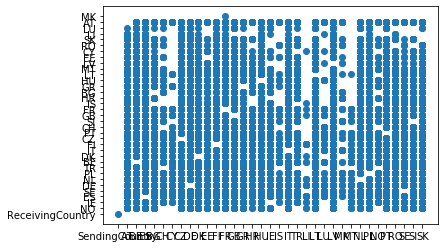

Processed 272498 lines.


C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


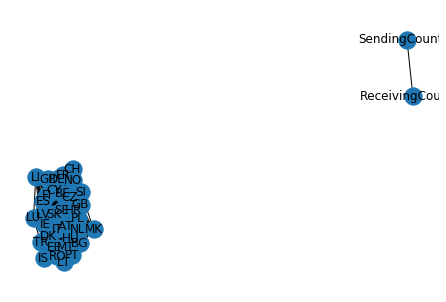

array(['ReceivingCountry', 'NO', 'NO', ..., 'GB', 'GB', 'ES'], dtype=object)

In [46]:
import networkx as nx 
import csv
import matplotlib.pyplot as plt


# Study how much countries send people to each other 

plt.plot(data_erasmus.SendingCountry, data_erasmus.ReceivingCountry, 'o')
#plt.plot(sample_data.column_a, sample_data.column_c)
plt.show()


# Define network of Erasmus connections
# nodes in the network are countries
# links in the travel network are built from data from columns "SendingCountry", "ReceivingCountry" 


G = nx.Graph() # create an empty graph


line_count = 0
for name, row in data_erasmus.iterrows():
    # Extract the source and dest airport ids.
    type(row[4])
    source = row["SendingCountry"]
    dest = row["ReceivingCountry"]
    
    G.add_node(row["SendingCountry"])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
    line_count += 1
    G.add_edge(row["SendingCountry"], row["ReceivingCountry"])
print(f'Processed {line_count} lines.')

nx.draw(G, with_labels = True)
plt.show()

data_erasmus.SendingCountry.values
data_erasmus.ReceivingCountry.values



Work in progress...